# Visualization with Matplotlib

The Matplotlib package was born, with version 0.1 released in 2003. It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. 
In recent years, however, the interface and style of Matplotlib have begun to show their age. Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned. Still, I’m of the opinion that we cannot ignore Matplotlib’s strength as a well-tested, cross-platform graphics engine.

Recent Matplotlib versions make it relatively easy to set new global plotting styles (see “Customizing Matplotlib: Configurations and Stylesheets”), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in “Visualization with Seaborn”), ggplot, HoloViews, Altair, and even Pandas itself can be used as wrappers around Matplotlib’s API. 



Just as we use the np shorthand for NumPy and the pd shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt

We will use the ```plt.style``` directive to choose appropriate aesthetic styles for our figures.

## Setting Styles

In [73]:
plt.style.use('classic')

In [66]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### ```plt.Show()```

If you are using Matplotlib from within a script, the function plt.show() is your friend.
plt.show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.
One thing to be aware of: the ```plt.show()``` command should be used only once per Python session, and is most often seen at the very end of the script. Multiple ```show()``` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.
So, for example, you may have a file called myplot.py containing the following:

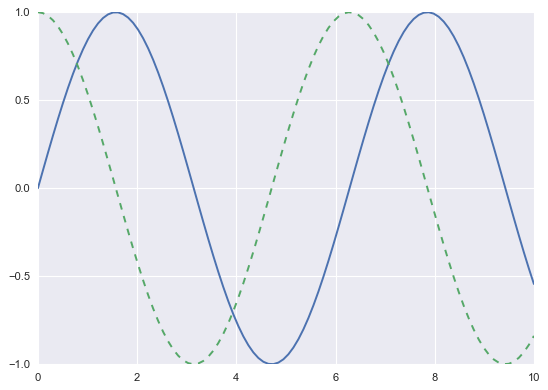

In [72]:

# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
plt.show()

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. You can save a figure using the ```savefig()``` command. For example, to save the previous figure as a PNG file, you can run this:

In [38]:
fig.savefig('my_figure.png')

In [39]:
ls

6-Visualizing amounts.pptx  my_figure.png
Intro to Matplotlib.ipynb


We can confrim what it contains using following command

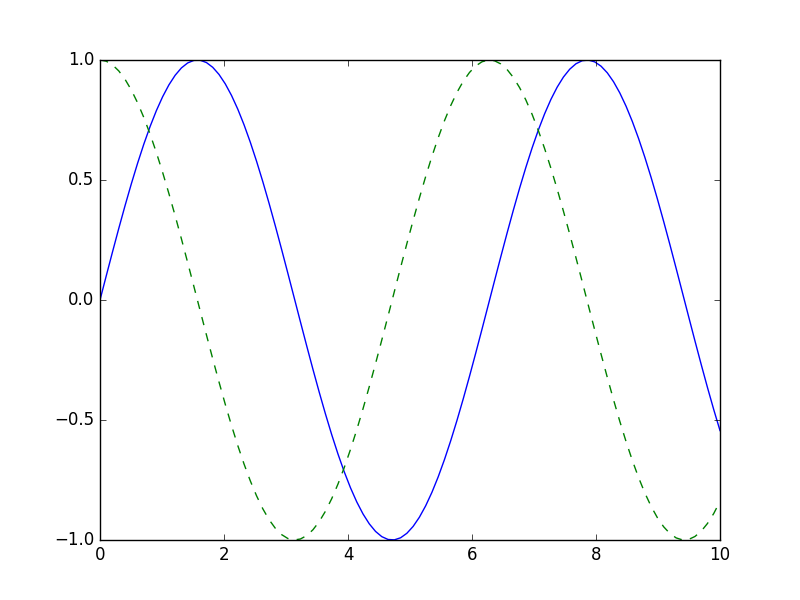

In [74]:
from IPython.display import Image
Image('my_figure.png')

You can find the list of supported file types for your system by using the following method of the figure canvas object:



In [41]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Simple Line Plots

As with all the following sections, we’ll start by setting up the notebook for plotting and importing the functions we will use:

In [75]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows:

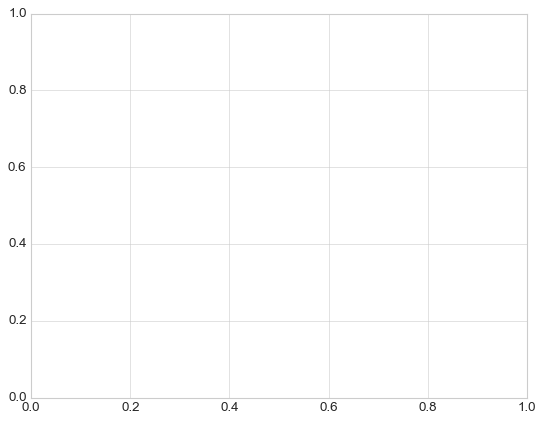

In [44]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the figure (an instance of the class ```plt.Figure```) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class ```plt.Axes```) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. Throughout this course, we’ll commonly use the variable name fig to refer to a figure instance, and ax to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ax.plot function to plot some data. Let’s start with a simple sinusoid

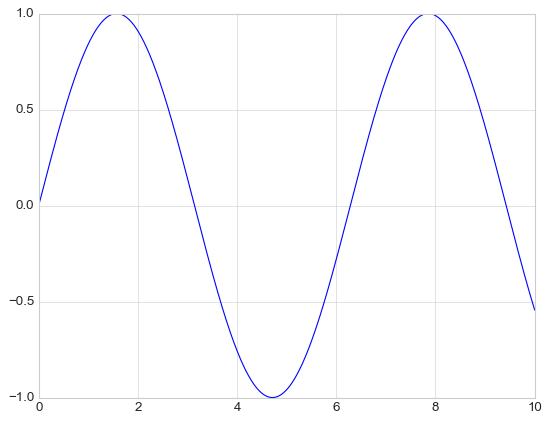

In [47]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background

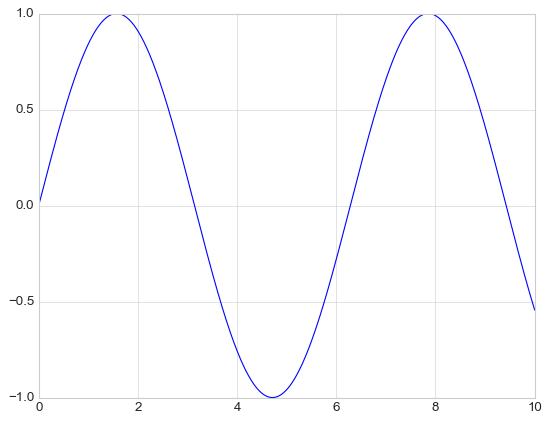

In [50]:
plt.plot(x, np.sin(x));

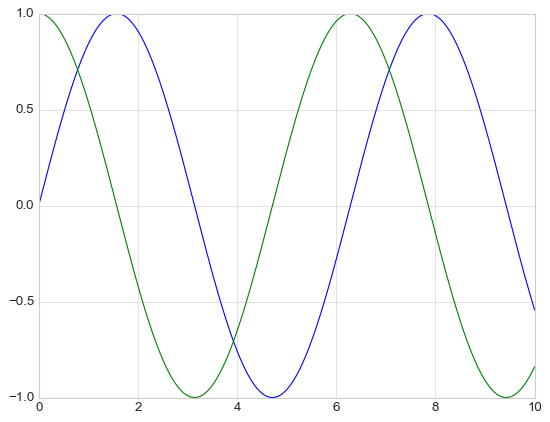

In [52]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We’ll quickly highlight the differences between the two here.

### MATLAB-style interface

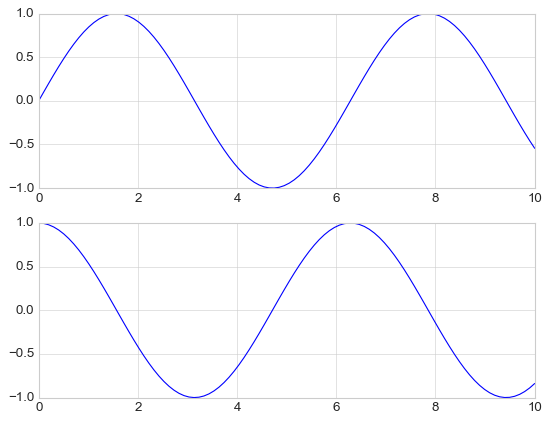

In [78]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))
# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.



## Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an “active” figure or axes, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects. To re-create the previous plot using this style of plotting, you might do the following

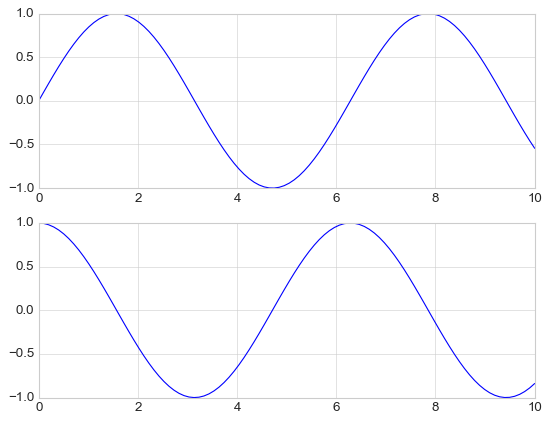

In [85]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated. Throughout this chapter, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient. In most cases, the difference is as small as switching ```plt.plot()``` to ```ax.plot()```, but there are a few gotchas that we will highlight as they come up in the following sections.



## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles. The ```plt.plot()``` function takes additional arguments that can be used to specify these. To adjust the color, you can use the color keyword, which accepts a string argument representing virtually any imaginable color. The color can be specified in a variety of ways [see here for more details](https://matplotlib.org/stable/tutorials/colors/colors.html)

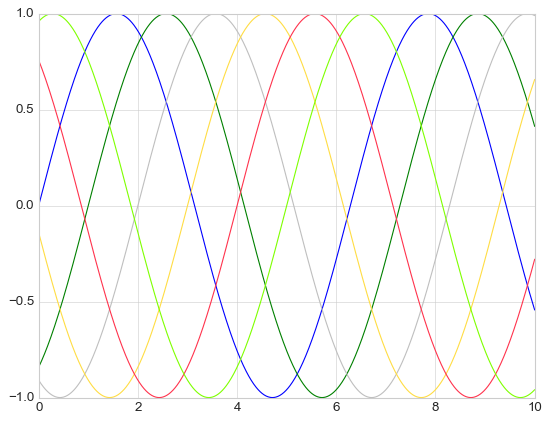

In [53]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Similarly, you can adjust the line style using the linestyle keyword

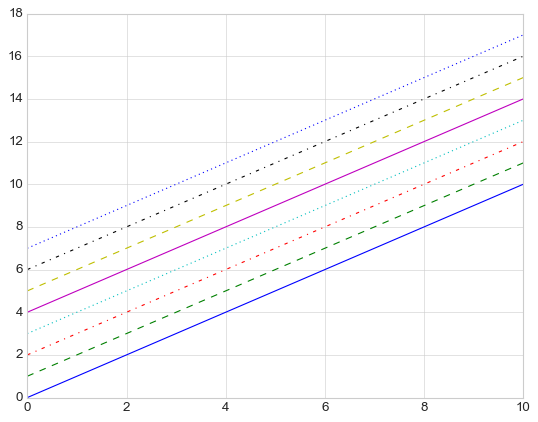

In [54]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these linestyle and color codes can be combined into a single nonkeyword argument to the plt.plot() function

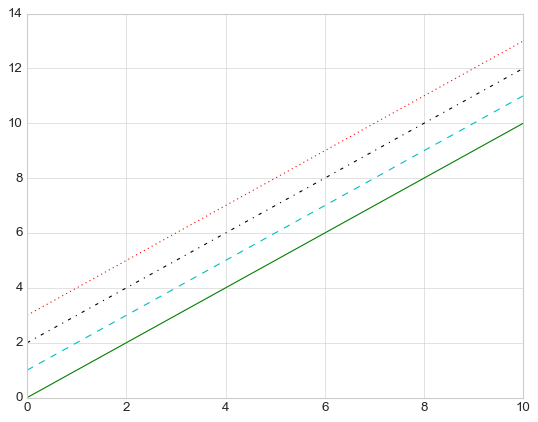

In [55]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it’s nice to have finer control. The most basic way to adjust axis limits is to use the ```plt.xlim()``` and ```plt.ylim()``` methods

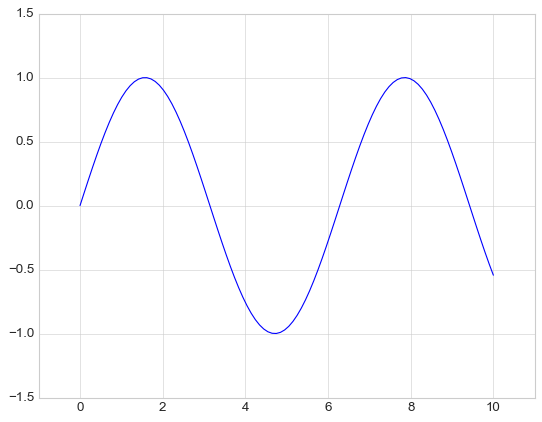

In [87]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you’d like either axis to be displayed in reverse, you can simply reverse the order of the arguments

A useful related method is plt.axis() (note here the potential confusion between axes with an e, and axis with an i). The ```plt.axis()``` method allows you to set the x and y limits with a single call, by passing a list that specifies ```[xmin, xmax, ymin, ymax]```

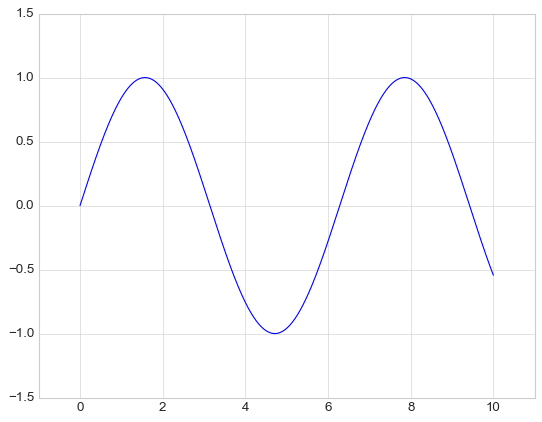

In [57]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

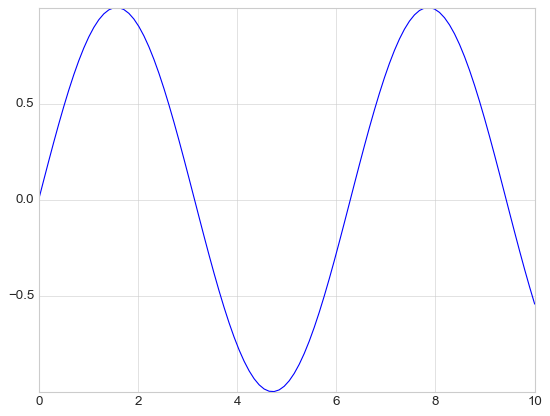

In [93]:
plt.plot(x, np.sin(x))
plt.axis('tight');

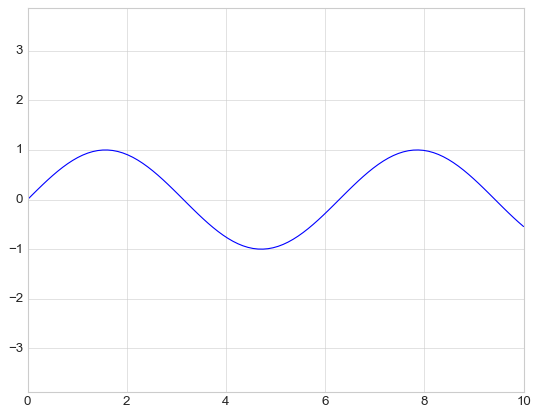

In [92]:
plt.plot(x, np.sin(x))
plt.axis('equal');

## Labeling Plots

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them

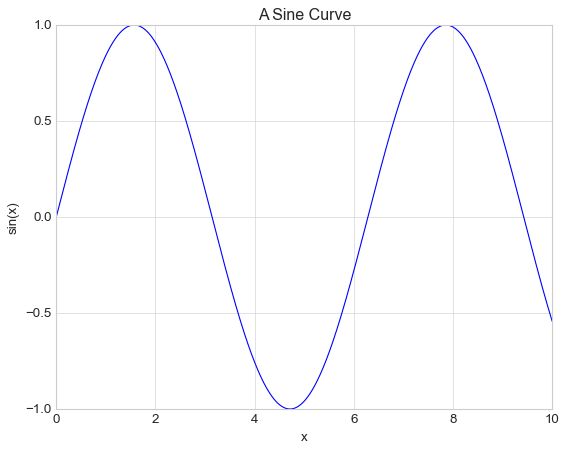

In [63]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

You can adjust the position, size, and style of these labels using optional arguments to the function. For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the (you guessed it) ```plt.legend()``` method. Though there are several valid ways of using this, I find it easiest to specify the label of each line using the label keyword of the plot function

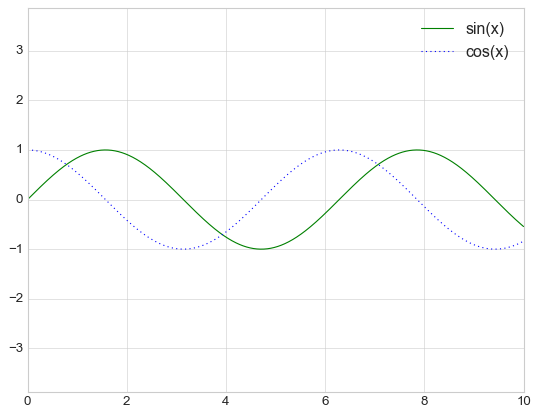

In [64]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

```plt.xlabel()``` → ```ax.set_xlabel()```

```plt.ylabel()``` → ```ax.set_ylabel()```

```plt.xlim()``` → ```ax.set_xlim()```

```plt.ylim()``` → ```ax.set_ylim()```

```plt.title() → ax.set_title()```

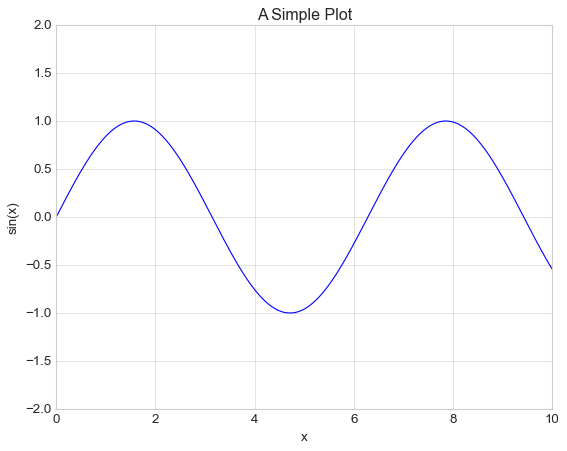

In [65]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
    xlabel='x', ylabel='sin(x)',
    title='A Simple Plot');